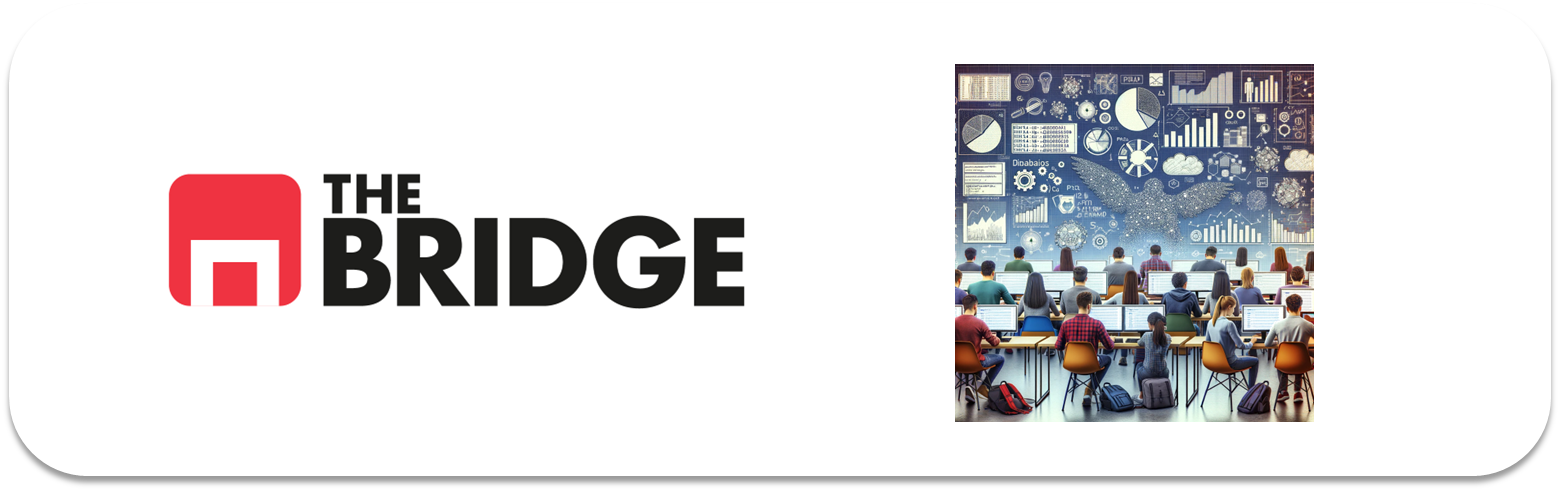

## PRACTICA OBLIGATORIA: **Estadistica Inferencial y Probabilidad**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [3]:
import math
from math import sqrt
import numpy as np
import pandas as pd
import scipy.stats as stats
import random

In [4]:
df_titanic = pd.read_csv("./data/titanic.csv")

In [5]:
df_titanic.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          891 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  891 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


# 1 Titanic

Carga el dataset del titanic, y contesta a las siguientes preguntas:




### 1. ¿Cuál es la probabilidad de superviviencia de un niño?

In [7]:
# hallamos la frecuencia absoluta
df_titanic["who"].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [8]:
# hallamos las edades de todos los niños supervivientes
dead= df_titanic.loc[(df_titanic["who"] == "child") & (df_titanic["alive"] == "yes")]

age_child= sorted(dead["age"].tolist())

print(age_child, end="")



[0.42, 0.67, 0.75, 0.75, 0.83, 0.83, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 7.0, 8.0, 8.0, 9.0, 9.0, 11.0, 12.0, 13.0, 13.0, 14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 15.0]

In [9]:
# filtramos solo por niños y filtramos por niños fallecidos
dead= df_titanic.loc[(df_titanic["who"] == "child") & (df_titanic["alive"] == "yes")]
#contar el numero
number_dead = dead.shape[0]

number_dead

49

In [10]:
# la media de edad de niños vivos y fallecidos, poniendolo bonito con unstack
df_mean = df_titanic.groupby(["who", "alive"])["age"].mean().unstack()
df_mean

alive,no,yes
who,,
child,7.220588,5.778980
man,33.029393,33.906477
woman,30.856061,32.368293


In [11]:

M_child= sum(age_child)/len(age_child)
M_child

5.778979591836735

In [12]:
# agrupando por la columna who , tomo la frecuencia absoluta normalizada de la columna alive, poniendolo bonito con unstack
tasa_supervivencia_gen= df_titanic.groupby('who')['alive'].value_counts(normalize=True).unstack()*100
tasa_supervivencia_gen

alive,no,yes
who,,
child,40.963855,59.036145
man,83.612663,16.387337
woman,24.354244,75.645756


En el Dataset hubo 83 niños, falleciendo 34 de ellos y 49 sobreviviendo,  con edades ecomprendidas entre 0.42 - 15.0, siendo la media edad de niños supervivientes 5.78 años y la tasa de supervivencia juvenil del 59%



In [11]:
# hallamos SE
s= 49
raiz= math.sqrt(83)
SE= s/raiz

#hallamos el IC
IC= 1.96*SE
print(f"SE:{SE}")
print(f"IC child:{IC}")
print(f" la media muestral de las edades de los niños supervivientes si se da la distribución guassiana es: {s+1.96} %, {s-1.96} %")

SE:5.378448739494827
IC child:10.54175952940986
 la media muestral de las edades de los niños supervivientes si se da la distribución guassiana es: 50.96 %, 47.04 %


#### RESULTADO: <BR>
con una significación de un 95 % se puede precisar que a probabilidad de superviviencia de un niño esta comprendida entre el 47.04% al 50.96% 

# CORRECCION CLASE JAIME

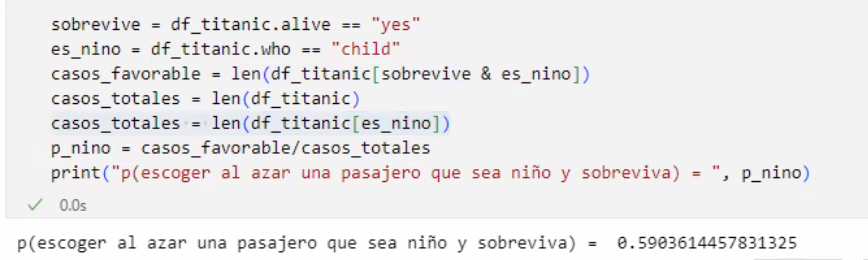

### 2. ¿Cuál es la probabilidad de que una mujer viajase sola?

In [14]:
#intersección es aplicar un AND: # AQUI COJO LA MUESTRA DE TODA LA POBLACION
viajar_sola = df_titanic.alone
woman = df_titanic["who"] == "woman"
casos_favorables = len(df_titanic[viajar_sola & woman]) # Esto equivale a calcular la cardinalidad del conjunto INTERSECCION
casos_totales = len(df_titanic)

print(f"p(que una mujer viajara sola en el Titanic) = {round(casos_favorables/casos_totales * 100,2)}%")

p(que una mujer viajara sola en el Titanic) = 13.58%


# CORRECCION CLASE JAIME

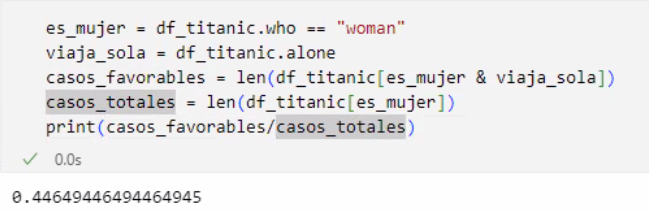

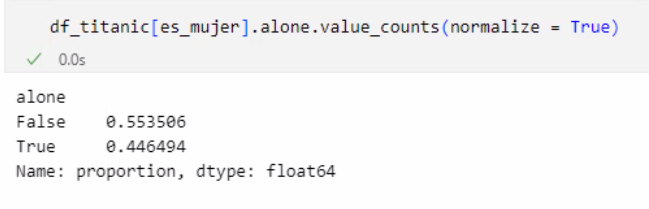

### 3. ¿Cuál es la probabilidad de sobreviviese un hombre entre 30 y 40 años que embarcó en Southampton y no tuvo que pagar billete?

In [15]:
df_titanic.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male',
       'embark_town', 'alive', 'alone'],
      dtype='object')

In [16]:
df_titanic.head(1)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.25,Third,man,True,Southampton,no,False


In [17]:
#filtrado
características1= (df_titanic.who == "man") & (df_titanic.age >= 30) & (df_titanic['age'] <= 40) & (df_titanic.embark_town == "Southampton") & (df_titanic.fare == 0)
casos_favorables = len(df_titanic[características1]) # Esto equivale a calcular la cardinalidad del conjunto INTERSECCION
casos_totales = len(df_titanic)

print(f"p(la supervivencia de un hombre entre 30-40 años que embarcó en el puerto de Southampton sin pagar billete ) = {round(casos_favorables/casos_totales * 100,2)}%")

p(la supervivencia de un hombre entre 30-40 años que embarcó en el puerto de Southampton sin pagar billete ) = 1.35%


# CORRECCION CLASE JAIME

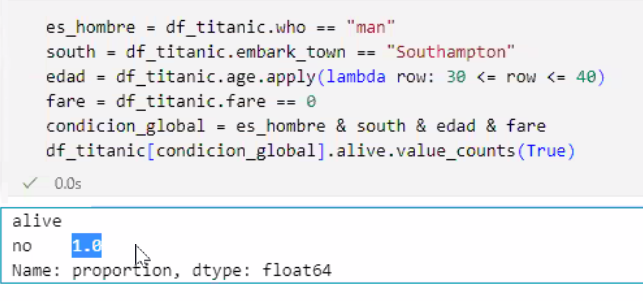

### 4. ¿Y si hubiera acompañado de 2 familiares?

In [7]:
caracteristicas2= (df_titanic.who == "man") & (df_titanic.age >= 30) & (df_titanic['age'] <= 40) & (df_titanic.embark_town == "Southampton") & (df_titanic.fare == 0) & (df_titanic.sibsp == 2)
casos_favorables = len(df_titanic[caracteristicas2]) # Esto equivale a calcular la cardinalidad del conjunto INTERSECCION
casos_totales = len(df_titanic)

print(f"p(la supervivencia de un hombre entre 30-40 años que embarcó en el puerto de Southampton sin pagar billete y acompañado de 2 familiares ) = {round(casos_favorables/casos_totales * 100,2)}%")

p(la supervivencia de un hombre entre 30-40 años que embarcó en el puerto de Southampton sin pagar billete y acompañado de 2 familiares ) = 0.0%


### 5. Si consideramos ahora que queremos tener cierta confianza estadística en nuestras probabilidades (ten en cuenta que estamos extrapolando los ratios de una muestra), cuál sería el rango de probabilidades de sobrevivir de una persona que viajase sola al 95%

In [19]:
df_titanic.head(1)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.25,Third,man,True,Southampton,no,False


In [20]:
#hallamos la media de superviviencia
df_titanic.groupby('who')['alive'].value_counts(normalize=True).unstack()*100

alive,no,yes
who,,
child,40.963855,59.036145
man,83.612663,16.387337
woman,24.354244,75.645756


In [21]:
#hallamos la media de superviviencia sola
df_titanic.groupby('alone')['alive'].value_counts(normalize=True).unstack()*100

alive,no,yes
alone,,
False,49.435028,50.564972
True,69.646182,30.353818


In [22]:

#SE
s= np.std(30.353818)
raiz= math.sqrt(len(df_titanic))
SE= s/raiz

IC= 1.96*SE

print(f"Con una probabilidad significativa del 95 %, el ratio de supervivencia de una persona sola está entre el : {30.353818+1.96, 30.353818-1.96}%")


Con una probabilidad significativa del 95 %, el ratio de supervivencia de una persona sola está entre el : (32.313818, 28.393818)%


# CORRECIONES CLASE JAIME

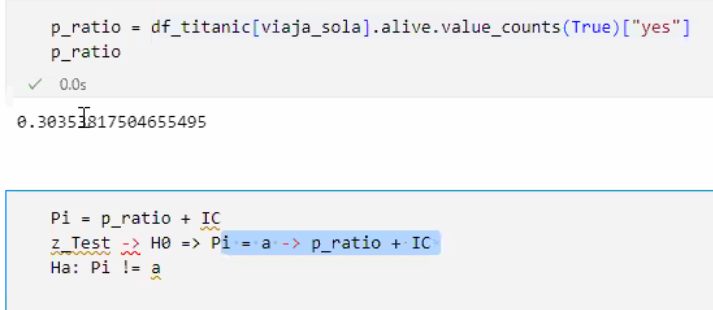

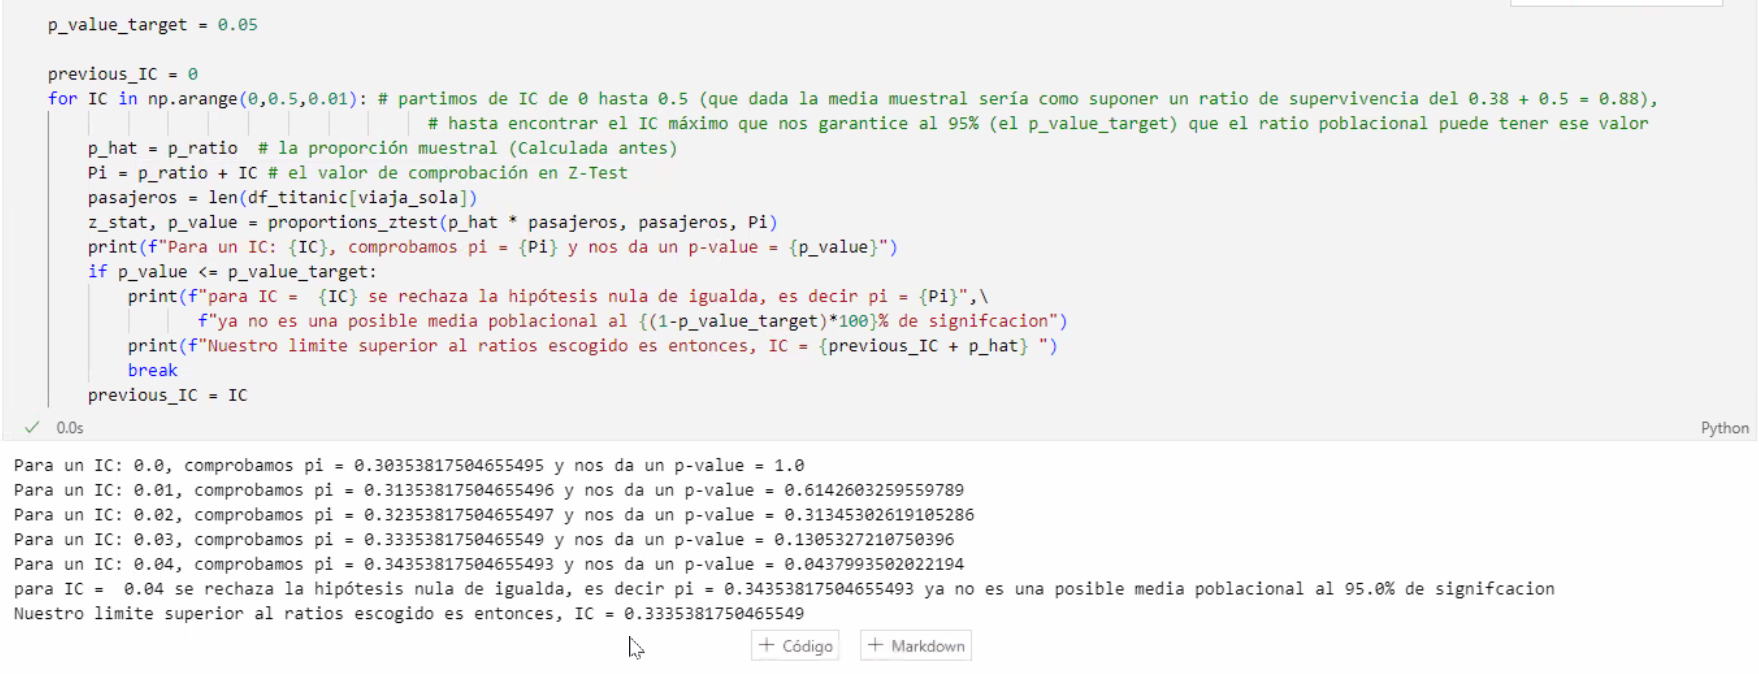

## . EXTRA: EXTRA: Y si además el pasajero de 5 fuera un pasajero de tercera o de segunda

In [23]:
df_titanic["class"].unique()

array(['Third', 'First', 'Second'], dtype=object)

In [5]:
caracteristicas= (df_titanic.alone == True) & (df_titanic["class"]== 'Second') | (df_titanic["class"]== 'Third')
casos_favorables = len(df_titanic[caracteristicas]) # Esto equivale a calcular la cardinalidad del conjunto INTERSECCION
casos_totales = len(df_titanic)

print(f"p(la supervivencia de un pasajero que viajó solo en segunda o tercera clase es = {round(casos_favorables/casos_totales * 100,2)}%")

p(la supervivencia de un pasajero que viajó solo en segunda o tercera clase es = 66.78%


# 2 Life Satisfaction

Carga el dataset de satifacción vital y contesta a las siguietnes preguntas:

1. Podemos asegurar con cierta confianza estadística (del 99%) que la satisfaccion vital media del mundo es menor de 7.
2. ¿Qué nivel de satisfacción media asignaríamos a país con esperanza de vida de más de 65 años y tasa de empleo superior a 60%? (ojo fijate que son umbrales)
3. ¿Cuál sería la probabilidad de tener más de 6 puntos de satisfacción vital para los países con esperanza de vida mayor a 65 años y tasa de empleo superior a 60%?


In [12]:
df_life_satisfaction = pd.read_csv("./data/lifesat_full.csv")


In [13]:
df_life_satisfaction.head()

,Country,GDP per capita (USD),Life satisfaction,Life expectancy,Homicide rate,Employment rate
0,South Africa,11466.189672,4.725336,57.5,13.7,43.0
1,Colombia,13441.492952,6.302556,76.2,24.5,67.0
2,Brazil,14063.982505,6.415187,74.8,26.7,61.0
3,Mexico,17887.750736,6.536861,75.4,18.1,61.0
4,Chile,23324.524751,6.538143,79.9,4.2,63.0


1. Podemos asegurar con cierta confianza estadística (del 99%) que la satisfaccion vital media del mundo es menor de 7.

In [27]:
#SE
s= df_life_satisfaction["Life satisfaction"].std()
raiz = math.sqrt(len(df_life_satisfaction))
SE= s/raiz
#media
means= df_life_satisfaction["Life satisfaction"].mean()
#IC
IC= 1.96*SE

print(f"IC:{IC}")
print(f"la media muestral al 95% de significación estadísitca, siempre que la distribución sea normal: {means+1.96, means-1.96}")



IC:0.2540456329052589
la media muestral al 95% de significación estadísitca, siempre que la distribución sea normal: (8.559421401893584, 4.639421401893583)


Ho: satisfaccion vital mayor o igual a 7<br>
Ha: satisfaccion vital menor a 7

In [28]:
stats.ttest_1samp(a=df_life_satisfaction["Life satisfaction"], popmean=7, alternative= "less")

TtestResult(statistic=-3.0905237114679207, pvalue=0.0019519917704683323, df=35)

Con el p_value podemos descartar la hipotesis nula y aceptar valida la alternativa: satisfacción vital menor a 7, con una probabilidad estadistica del 99% de confianza

# CORRECCCION CLASE JAIME(forma alternativa)

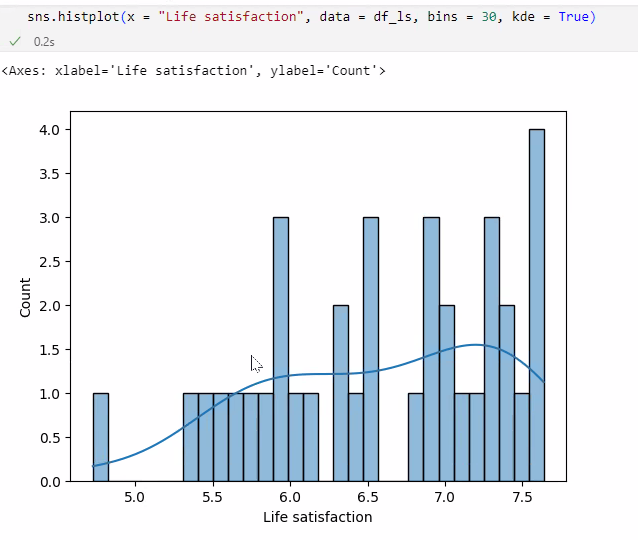

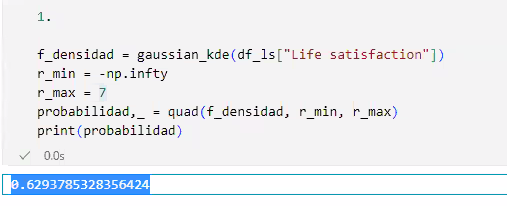

2. ¿Qué nivel de satisfacción media asignaríamos a país con esperanza de vida de más de 65 años y tasa de empleo superior a 60%? (ojo fijate que son umbrales)

In [29]:
caracteristicas= (df_life_satisfaction["Life expectancy"] > 65) &(df_life_satisfaction["Employment rate"] > 60)
casos_favorables= len(df_life_satisfaction[caracteristicas])
casos_totales= len(df_life_satisfaction)

print(f"p(que la satisfacción media de un pais tenga una esperanza de vida de más de 65 años y una tasa de empleo superior al 60%: {round(casos_favorables/casos_totales *100,2)}%")

p(que la satisfacción media de un pais tenga una esperanza de vida de más de 65 años y una tasa de empleo superior al 60%: 88.89%


In [30]:
#hallo la desviacion standar general  de la muestra con las caracteristicas para hallar el error estandar(SE)
col_num = df_life_satisfaction.select_dtypes(include='number')# debido a que habia algun dato string, le digo que solo escoja tipos numericos

std= col_num.loc[(df_life_satisfaction["Life expectancy"] > 65) & (df_life_satisfaction["Employment rate"] > 60)].std()
std

GDP per capita (USD)    20005.646176
Life satisfaction           0.674911
Life expectancy             3.137647
Homicide rate               6.734789
Employment rate             5.722673
dtype: float64

In [31]:
#hallo la media general  de la muestra con las caracteristicas para hallar el error estandar(SE)
col_num = df_life_satisfaction.select_dtypes(include='number')# debido a que habia algun dato string, le digo que solo escoja tipos numericos

media= col_num.loc[(df_life_satisfaction["Life expectancy"] > 65) & (df_life_satisfaction["Employment rate"] > 60)].mean()
media

GDP per capita (USD)    44632.029470
Life satisfaction           6.746145
Life expectancy            80.003125
Homicide rate               3.693750
Employment rate            70.343750
dtype: float64

In [32]:
s= np.std(len(df_life_satisfaction[caracteristicas]))
raiz= math.sqrt(len(df_life_satisfaction))
SE= s/SE
IC= SE*1,96
media_ejer_2 = (80.003125 + 70.343750)/2

print(f"IC:{IC}")
print(f"la media muestral con el 95% de confianza estadistica, siempre que sea de tipo gaussiana: {media_ejer_2+1.96, media_ejer_2-1.96}")

IC:(0.0, 96)
la media muestral con el 95% de confianza estadistica, siempre que sea de tipo gaussiana: (77.1334375, 73.21343750000001)


In [37]:
stats.ttest_1samp(a=casos_favorables, popmean=77, alternative= "greater")

TtestResult(statistic=nan, pvalue=nan, df=0)

# CORRECCION CLASE JAIME

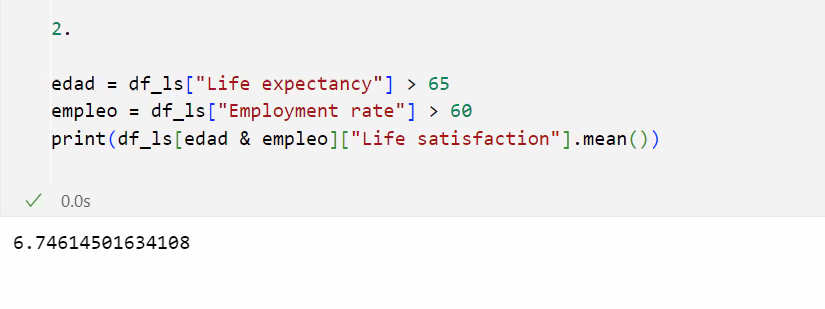

3. ¿Cuál sería la probabilidad de tener más de 6 puntos de satisfacción vital para los países con esperanza de vida mayor a 65 años y tasa de empleo superior a 60%?

In [34]:
caracteristicas= (df_life_satisfaction["Life expectancy"] > 65) &(df_life_satisfaction["Employment rate"] > 60) & (df_life_satisfaction["Life satisfaction"] > 6.0)
casos_favorables= len(df_life_satisfaction[caracteristicas])
casos_totales= len(df_life_satisfaction)

print(f"p(que la satisfacción media de un pais tenga una esperanza de vida de más de 65 años y una tasa de empleo superior al 60%: {round(casos_favorables/casos_totales *100,2)}%")

p(que la satisfacción media de un pais tenga una esperanza de vida de más de 65 años y una tasa de empleo superior al 60%: 69.44%


# CORRECCIONES CLASE JAIME

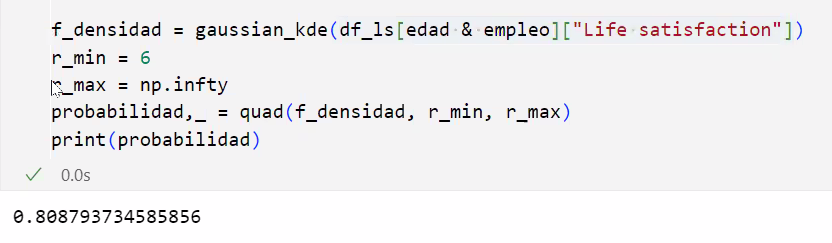

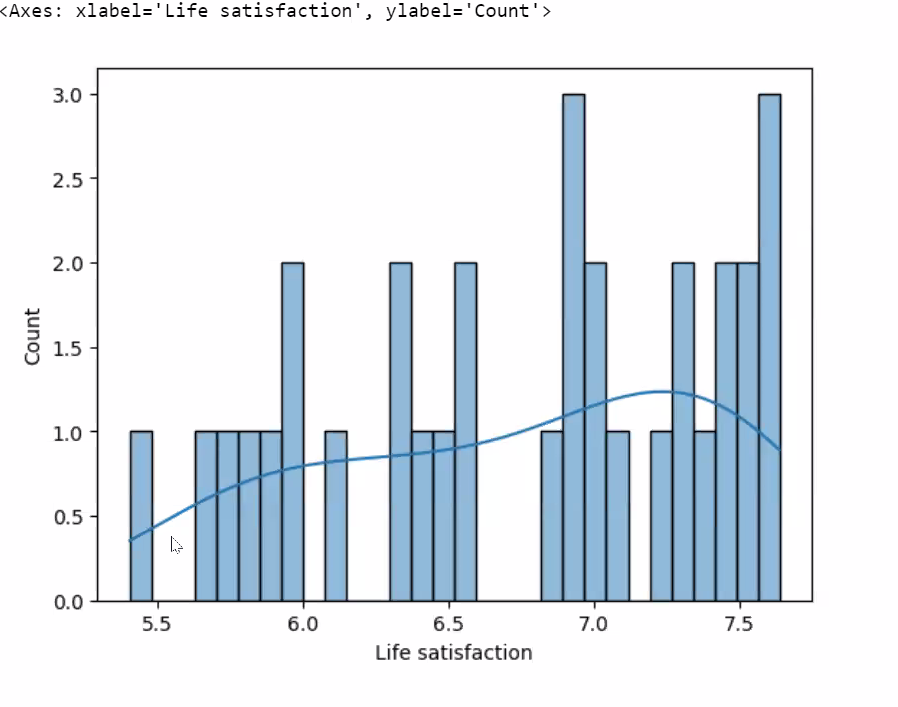

## EXTRA: La contrainituividad de la probabilidad

Para poder lidiar con la incertidumbre que nos rodea, **solemos aplicar lo que llamamos nuestro "*sentido común*"**. Por ejemplo, si al levantarnos por la mañana vemos que el día se encuentra nublado, este hecho no nos da la **certeza** de que comenzará a llover más tarde; sin embargo, nuestro *sentido común* puede inducirnos a cambiar nuestros planes y a actuar como si *creyéramos* que fuera a llover si las nubes son los suficientemente oscuras o si escuchamos truenos, ya que nuestra experiencia nos dice que estos signos indicarían una mayor *posibilidad* de que el hecho de que fuera a llover más tarde realmente ocurra. 
Nuestro *sentido común* es algo tan arraigado en nuestro pensamiento, que lo utilizamos automáticamente sin siquiera ponernos a pensar en ello; pero muchas veces, el *sentido común* también nos puede jugar una mala pasada y hacernos elegir una respuesta incorrecta.


#### Situación 1 - La coincidencia de cumpleaños
Vamos a una fiesta a la que concurren un total de 50 personas. Allí un amigo nos desafía afirmando que en la fiesta debe haber por lo menos 2 personas que cumplen años el mismo día y nos apuesta 100 euros a que está en lo correcto. Es decir, que si él acierta deberíamos pagarle los 100 euros; o en caso contrario, el nos pagará los 100 euros. ¿Deberíamos aceptar la apuesta? 


#### Situación 2 - ¿Que puerta elegir? (El dilema de Monty Hall)
Estamos participando en un concurso en el cual se nos ofrece la posibilidad de elegir una entre tres puertas. Tras una de ellas se encuentra una ferrari ultimo modelo, y detrás de las otras dos hay una cabra; luego de elegir una puerta, el presentador del concurso abre una de las puertas restantes y muestra que hay una cabra (el presentador sabe que hay detrás de cada puerta). Luego de hacer esto, el presentador nos ofrece la posibilidad de cambiar nuestra elección inicial y quedarnos con la otra puerta que no habíamos elegido inicialmente. ¿Deberíamos cambiar o confiar en nuestra elección inicial?

¿Qué te diría su *sentido común* que deberían hacer en cada una de estas situaciones?

In [35]:
## SITUACION 1

In [16]:
personas = 50

casos_totales= 50
# Genero fechas de cumpleaños aleatorias
fechas_cumpleaños = [random.randint(1, 365) for _ in range(personas)]

#compruebo si hay alguna fecha que coincida, eliminando duplicados con set
if personas == len(set(fechas_cumpleaños)):
     print("no hay posibilidad que 2 personas cumplan el mimso día")

else:
    casos_favorables=0
    for _ in range(casos_totales):
        casos_favorables+=1
        
        


print(f"p( que al menos haya 2 personas con la misma fecha de cumpleaños en una fiesta con 50 personas: {(casos_favorables/casos_totales *100)}%")

no hay posibilidad que 2 personas cumplan el mimso día
p( que al menos haya 2 personas con la misma fecha de cumpleaños en una fiesta con 50 personas: 48.0%


# CORRECCION CLASE JAIME

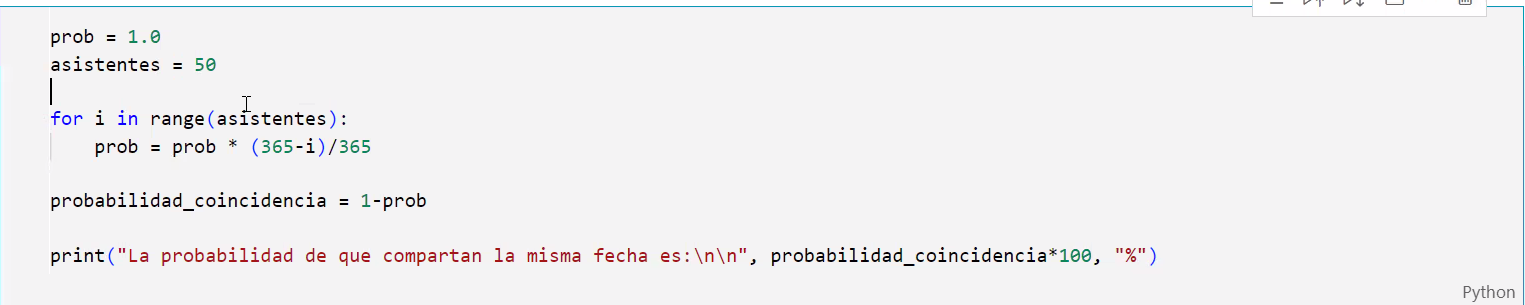

# JUEGO CON EL CIUMPLEAÑOS DE SARA

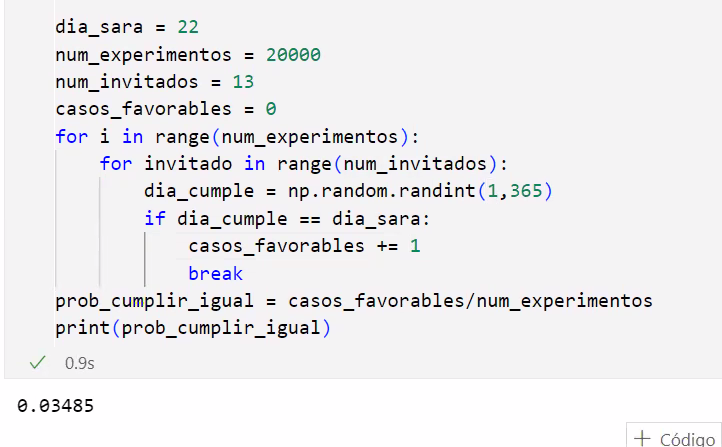


# CORRECION CLASE JAIME: Situación 2 - ¿Que puerta elegir? (El dilema de Monty Hall)


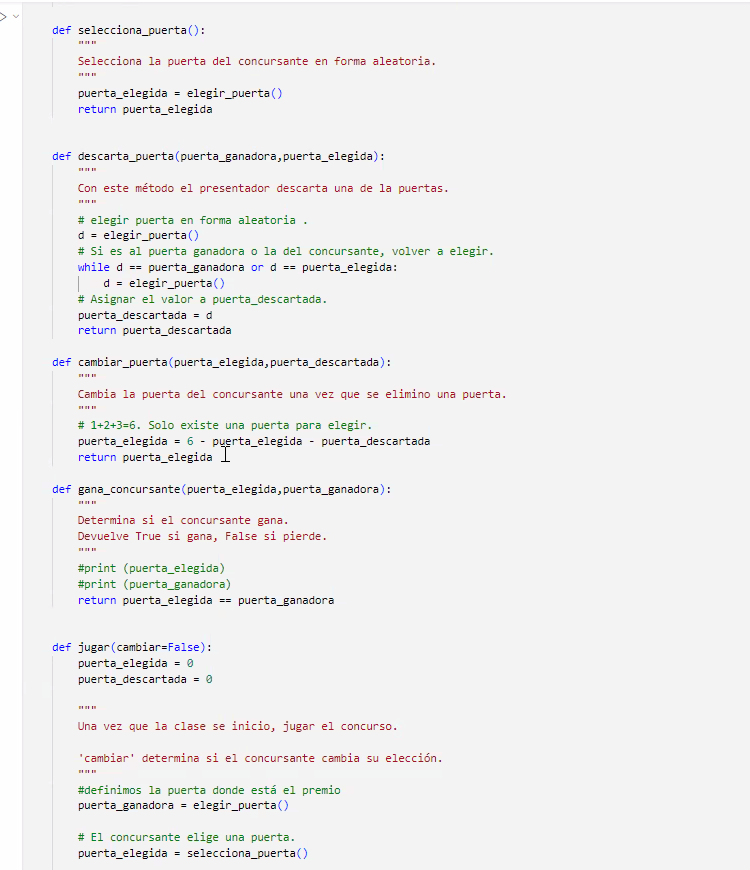

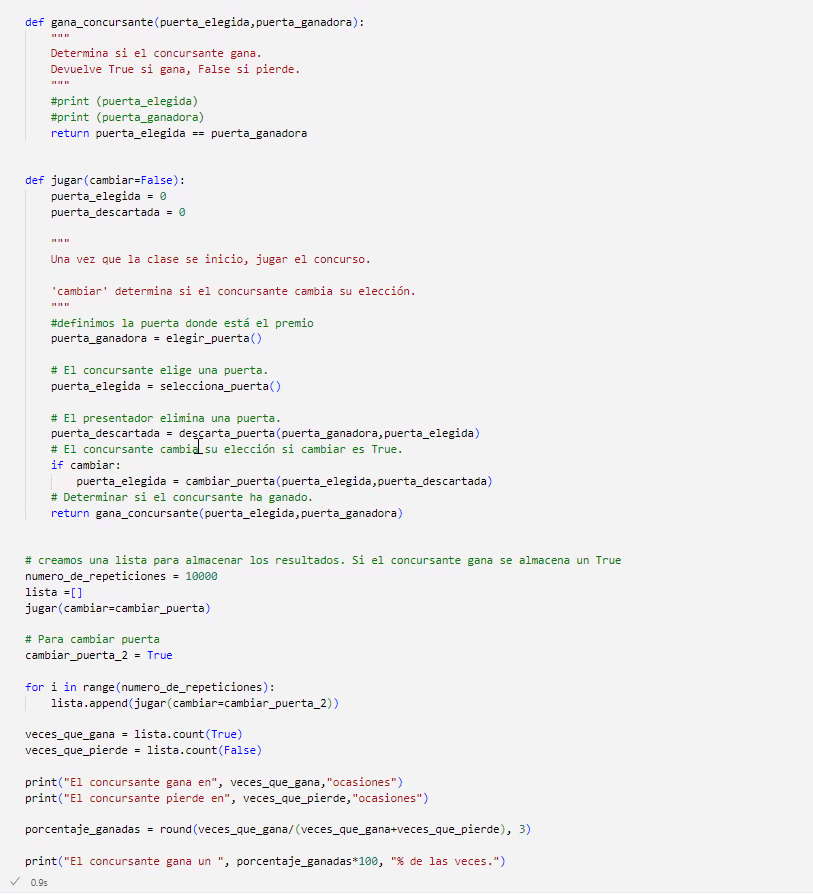